In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [3]:
def load_data():
    train_data = pd.read_csv('train_values.csv')
    train_label = pd.read_csv('train_labels.csv')
    test_data = pd.read_csv('test_values.csv')
    return train_data, train_label, test_data

In [4]:
train_data, train_label, test_data = load_data()

In [5]:
train_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,0


In [6]:
train_label.head()

,building_id,damage_grade
0,802906,3
1,28830,2
2,94947,3
3,590882,2
4,201944,3


In [7]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,300051,17,596,11307,3,20,7,6,t,r,...,0,0,0,0,0,0,0,0,0,0
1,99355,6,141,11987,2,25,13,5,t,r,...,1,0,0,0,0,0,0,0,0,0
2,890251,22,19,10044,2,5,4,5,t,r,...,0,0,0,0,0,0,0,0,0,0
3,745817,26,39,633,1,0,19,3,t,r,...,0,0,1,0,0,0,0,0,0,0
4,421793,17,289,7970,3,15,8,7,t,r,...,0,0,0,0,0,0,0,0,0,0


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 39 columns):
 #   Column                                  Non-Null Count   Dtype 
---  ------                                  --------------   ----- 
 0   building_id                             260601 non-null  int64 
 1   geo_level_1_id                          260601 non-null  int64 
 2   geo_level_2_id                          260601 non-null  int64 
 3   geo_level_3_id                          260601 non-null  int64 
 4   count_floors_pre_eq                     260601 non-null  int64 
 5   age                                     260601 non-null  int64 
 6   area_percentage                         260601 non-null  int64 
 7   height_percentage                       260601 non-null  int64 
 8   land_surface_condition                  260601 non-null  object
 9   foundation_type                         260601 non-null  object
 10  roof_type                               260601 non-null 

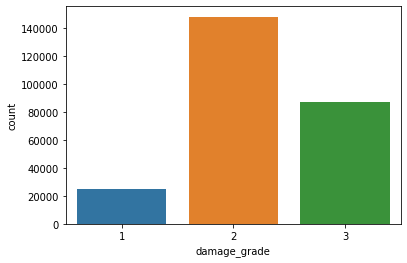

In [9]:
sns.countplot(train_label['damage_grade'])

In [10]:
def concat_data_label(train_data, train_label):
    return pd.merge(train_data, train_label, how='inner', on='building_id')

In [11]:
train_df = concat_data_label(train_data, train_label)
train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3


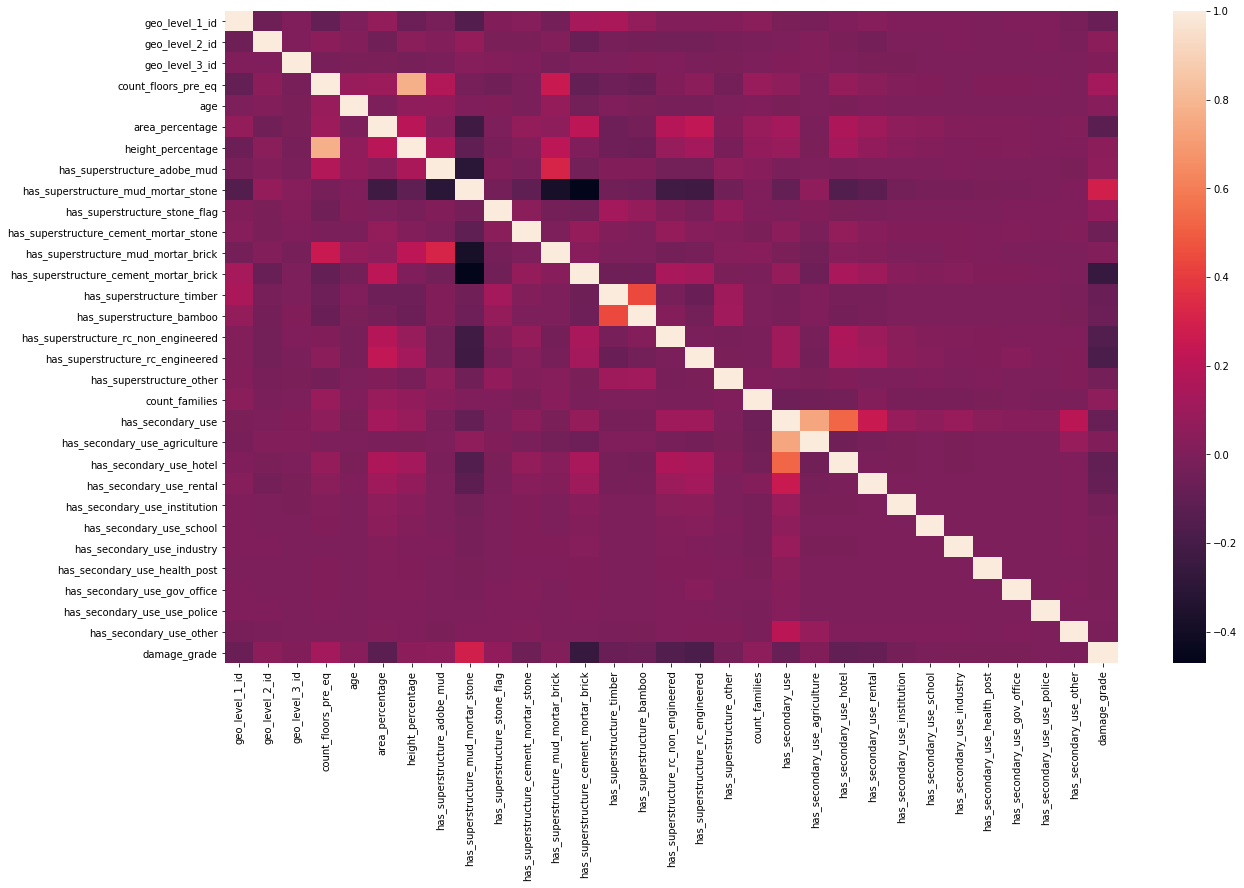

In [12]:
plt.figure(figsize=(20,12))
sns.heatmap(train_df.drop('building_id', axis=1).corr())

Now we have 2 data set: train_df, test_data

# Data Preprocessing

In [13]:
train_df.columns

Index(['building_id', 'geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id',
       'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'plan_configuration', 'has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_i

In [14]:
int_columns = ['geo_level_1_id', 'geo_level_2_id', 'geo_level_3_id', 'count_floors_pre_eq', 'age', 'area_percentage', 'height_percentage']
boolean_columns = ['has_superstructure_adobe_mud',
       'has_superstructure_mud_mortar_stone', 'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other']
object_columns = train_df.select_dtypes(include='object').columns

In [15]:
# ONE HOT ENCODING
train_df = pd.get_dummies(train_df, columns=object_columns)
test_data = pd.get_dummies(test_data, columns=object_columns)
train_df.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,6,487,12198,2,30,6,5,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,8,900,2812,2,10,8,7,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,21,363,8973,2,10,5,5,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,22,418,10694,2,10,6,5,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,11,131,1488,3,30,8,9,1,0,...,0,0,0,0,0,0,0,0,1,0


In [16]:
train_df['age'] = train_df['age'].apply(lambda x: train_df['age'].mode()[0] if x==995 else x)
test_data['age'] = test_data['age'].apply(lambda x: test_data['age'].mode()[0] if x==995 else x)

In [17]:
scaler = MinMaxScaler()
train_df[int_columns] = scaler.fit_transform(train_df[int_columns])
test_data[int_columns] = scaler.transform(test_data[int_columns])

In [18]:
train_df

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,802906,0.200000,0.341275,0.970637,0.125,0.150,0.050505,0.100000,1,1,...,0,0,0,0,0,0,0,0,1,0
1,28830,0.266667,0.630694,0.223761,0.125,0.050,0.070707,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0
2,94947,0.700000,0.254380,0.714013,0.125,0.050,0.040404,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,590882,0.733333,0.292922,0.850959,0.125,0.050,0.050505,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
4,201944,0.366667,0.091801,0.118405,0.250,0.150,0.070707,0.233333,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,0.833333,0.935529,0.128989,0.000,0.275,0.050505,0.033333,0,1,...,0,0,0,1,0,0,0,0,1,0
260597,669485,0.566667,0.501051,0.163921,0.125,0.000,0.050505,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
260598,602512,0.566667,0.035739,0.649558,0.250,0.275,0.050505,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0
260599,151409,0.866667,0.027330,0.147291,0.125,0.050,0.131313,0.133333,0,0,...,0,0,0,0,0,0,0,0,1,0


# Feature Engineer

# Train Model

In [19]:
from sklearn.ensemble import GradientBoostingRegressor, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split

In [20]:
X = train_df.drop(['damage_grade', 'building_id'], axis=1)
y = train_df['damage_grade']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
def pipeline_validation(X_train, y_train, X_test, y_test, learning_rate=0.1, n_estimators=100, max_depth=7):
    model = GradientBoostingClassifier(random_state=42, learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X_train, y_train)
    prediction = model.predict(X_test)
    return f1_score(y_test, prediction, average='micro')

In [23]:
acc = pipeline_validation(X_train, y_train, X_test, y_test, learning_rate=0.1, n_estimators=50, max_depth=6)

In [24]:
acc

0.6996968572926926

In [25]:
# acc_array = []
# for i in [12,16,20]:
#     acc = pipeline_validation(X_train, y_train, X_test, y_test, learning_rate=0.1, n_estimators=50, max_depth=i)
#     acc_array.append(acc)
# plt.figure(figsize=(10,6))
# plt.plot([12,16,20], acc_array)
# plt.xlabel('Max Depth')
# plt.ylabel('F1-score')

In [26]:
# acc_array = []
# for i in [50, 100, 250, 500, 1000]:
#     acc = pipeline_validation(X_train, y_train, X_test, y_test, learning_rate=0.1, n_estimators=i, max_depth=12)
#     acc_array.append(acc)
# plt.figure(figsize=(10,6))
# plt.plot([50,100,250,500,1000], acc_array)
# plt.xlabel('N_estimators')
# plt.ylabel('F1-score')

In [27]:
test_data.head()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,plan_configuration_m,plan_configuration_n,plan_configuration_o,plan_configuration_q,plan_configuration_s,plan_configuration_u,legal_ownership_status_a,legal_ownership_status_r,legal_ownership_status_v,legal_ownership_status_w
0,300051,0.566667,0.417659,0.899737,0.250,0.100,0.060606,0.133333,0,1,...,0,0,0,0,0,0,0,0,1,0
1,99355,0.200000,0.098809,0.953847,0.125,0.125,0.121212,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
2,890251,0.733333,0.013315,0.799236,0.125,0.025,0.030303,0.100000,0,1,...,0,0,0,0,0,0,0,0,1,0
3,745817,0.866667,0.027330,0.050370,0.000,0.000,0.181818,0.033333,0,0,...,0,0,0,0,0,0,0,0,1,0
4,421793,0.566667,0.202523,0.634201,0.250,0.075,0.070707,0.166667,0,1,...,0,0,0,0,0,0,0,0,1,0


# Submission

In [28]:
def pipeline_submission(X, y, test_data_, learning_rate=0.1, n_estimators=50, max_depth=12):
    model = GradientBoostingClassifier(random_state=42, learning_rate=learning_rate, n_estimators=n_estimators, max_depth=max_depth)
    model.fit(X, y)
    prediction = model.predict(test_data_)
    return prediction

In [29]:
test_data_ = test_data.drop('building_id', axis=1)

In [31]:
damage_grade = pipeline_submission(X, y, test_data_, learning_rate=0.1, n_estimators=50, max_depth=12)

In [32]:
submission_ = pd.DataFrame()
submission_['building_id'] = test_data['building_id']
submission_['damage_grade'] = damage_grade

In [33]:
submission_.to_csv('submission.csv', index=False)